### Task 3: Linear Regression

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Loading Dataset
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Checking for missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Defining features and target variable
X = df[['area', 'bedrooms', 'bathrooms', 'parking']]
y = df['price']

In [6]:
# Splitting the dataset and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean absolute Error:', mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean absolute Error: 1245976.2469755039
Mean Squared Error: 2608333790562.2754
R^2 Score: 0.48396527035294856


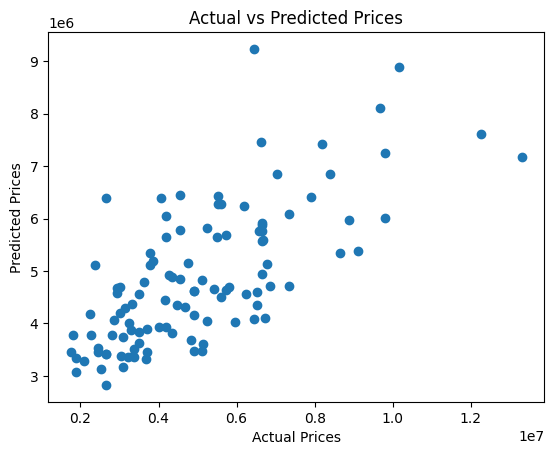

In [7]:
# plotting regression line
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


<Figure size 1000x600 with 0 Axes>

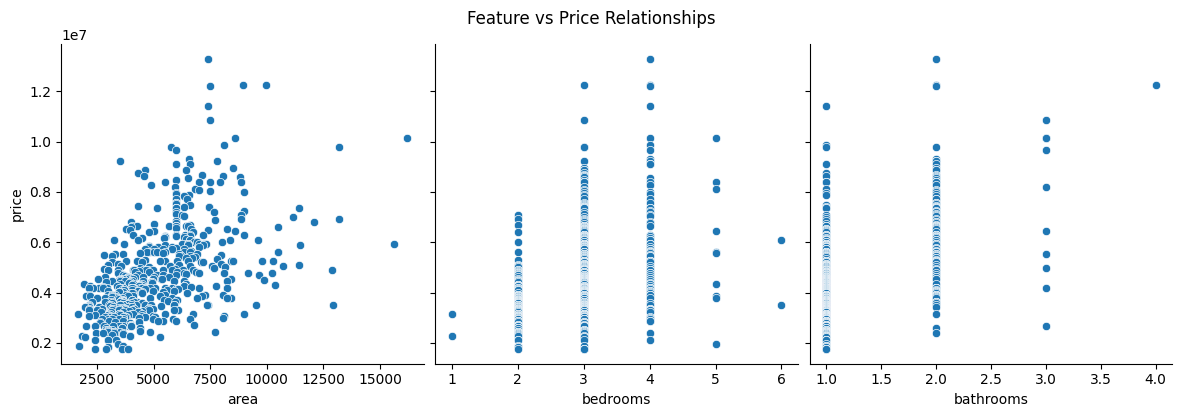

In [8]:
# Visualizing the relationships between features and target variable
plt.figure(figsize=(10, 6))
sns.pairplot(df, x_vars=['area', 'bedrooms', 'bathrooms'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.suptitle("Feature vs Price Relationships", y=1.02)
plt.show()

In [9]:
# intercept and coefficients
print("Intercept:", model.intercept_)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Intercept: 173253.93389521632
            Coefficient
area       3.070804e+02
bedrooms   3.419436e+05
bathrooms  1.356851e+06
parking    3.222240e+05
